In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from scipy import ndimage

In [2]:
def initU(x,y,c):
    U=np.random.rand(x,y,c)
    rsum=U.sum(axis=2)
    NU = np.divide(U,rsum[:,:, None])
    return NU

def dist_matf(data,cen,c):
    eps=0.001
    x,y,d = data.shape #(x,y,3)
    c = cen.shape[0] #(c,3)
    dist=np.zeros((x,y,c),dtype=float)
    for i in range(x):
        for j in range(y):
            for k in range(c):
                sum=0;
                for t in range(d):
                    sum=sum+ (data[i,j,t]-cen[k,t])**2
                dist[i,j,k]=sum #(takes root of dist)
    return dist+eps

def SNI_DIST(dist_mat,ws,c,U):
    # print('U shape=',U.shape)
    # print('dist_mat shape in sni_dist=',dist_mat.shape)
    num=U*dist_mat
    new_data=[]
    # new_datad=[]
    kernel=np.ones((ws,ws),dtype=np.float32)
    kernel[ws//2][ws//2]=0;
    for i in range(c):
        tempd=U[:,:,i]
        temp=num[:,:,i]
        temp2=ndimage.convolve(temp,kernel,mode='constant',cval=0.0)
        temp2d=ndimage.convolve(tempd,kernel,mode='constant',cval=0.0)
        temp3=temp2/temp2d
        new_data.append(temp3)
        # new_datad.append(temp2d)
    # dist_sum=np.stack(new_data,axis=2)
    # denom=np.stack(new_data,axis=2)
    # SNI=np.divide(dist_sum,denom)
    SNI=np.stack(new_data,axis=2)
    return SNI 

# def SNI_dataf(data,ws,c,U):
#     eps=0.001
#     data_u=data[:,:,0]
#     data_nu=data[:,:,1]
#     data_h=data[:,:,2]
#     # repeats data for c centorids for muplticlication with membership matrix
#     # data_u3d=np.repeat(data_u[:,:,None],repeats=c,axis=2) # (XxYxc)
#     # data_nu3d=np.repeat(data_nu[:,:,None],repeats=c,axis=2) # (XxYxc)
#     # data_h3d=np.repeat(data_h[:,:,None],repeats=c,axis=2) # (XxYxc)
#     num_u=data_u*U
#     num_nu=data_nu*U
#     num_h=data_h*U
#     kernel=np.ones((ws,ws),dtype=np.float32)
#     kernel[ws//2][ws//2]=0;
#     new_data=[]
#     # new_datad=[]
#     for i in range(c):
#         temp_u=num_u[:,:,i]
#         temp_nu=num_nu[:,:,i]
#         temp_h=num_h[:,:,i]
#         tempd=U[:,:,i]
#         temp2_u=ndimage.convolve(temp_u,kernel,mode='constant',cval=0.0)
#         temp2_nu=ndimage.convolve(temp_nu,kernel,mode='constant',cval=0.0)
#         temp2_h=ndimage.convolve(temp_h,kernel,mode='constant',cval=0.0)
#         temp2d=ndimage.convolve(tempd,kernel,mode='constant',cval=0.0)
#         temp3_u=temp2_u/temp2d
#         temp3_nu=temp2_nu/temp2d
#         temp3_h=temp2_h/temp2d
#         new_data.append([temp3_u,temp3_nu,temp3_h])
#         # new_datad.append(temp2)
#     # Mul=np.stack(new_data,axis=2) #(XxYxc)
#     # denom=np.stack(new_datad,axis=2) #(XxYxc)
#     # SNI_data=np.divide(Mul,denom+eps)
#     SNI_data=np.stack(new_data,axis=3)
#     return SNI_data
def SNI_dataf(data,ws,c,U):
    eps=0.001
    data_u=data[:,:,0]
    data_nu=data[:,:,1]
    data_h=data[:,:,2]
    repeated_data_u = np.repeat(data_u[:, :, np.newaxis], c, axis=-1)  # Shape becomes (x, y, 3, c)
    num_u = repeated_data_u * U  # Shape becomes (x, y, 1, c)
    # num_u=np.transpose(num_u,(0,1,3,2))
    repeated_data_nu = np.repeat(data_nu[:, :, np.newaxis], c, axis=-1)  # Shape becomes (x, y, 3, c)
    num_nu = repeated_data_nu * U  # Shape becomes (x, y, 1, c)
    repeated_data_h = np.repeat(data_h[:, :,  np.newaxis], c, axis=-1)  # Shape becomes (x, y, 3, c)
    num_h = repeated_data_h * U  # Shape becomes (x, y, 1, c)
    
    # repeats data for c centorids for muplticlication with membership matrix
    # data_u3d=np.repeat(data_u[:,:,None],repeats=c,axis=2) # (XxYxc)
    # data_nu3d=np.repeat(data_nu[:,:,None],repeats=c,axis=2) # (XxYxc)
    # data_h3d=np.repeat(data_h[:,:,None],repeats=c,axis=2) # (XxYxc)
    # num_u=data_u*U
    # num_nu=data_nu*U
    # num_h=data_h*U
    kernel=np.ones((ws,ws),dtype=np.float32)
    kernel[ws//2][ws//2]=0;
    new_data=[]
    # new_datad=[]
    for i in range(c):
        temp_u=num_u[:,:,i]
        temp_nu=num_nu[:,:,i]
        temp_h=num_h[:,:,i]
        tempd=U[:,:,i]
        temp2_u=ndimage.convolve(temp_u,kernel,mode='constant',cval=0.0)
        temp2_nu=ndimage.convolve(temp_nu,kernel,mode='constant',cval=0.0)
        temp2_h=ndimage.convolve(temp_h,kernel,mode='constant',cval=0.0)
        temp2d=ndimage.convolve(tempd,kernel,mode='constant',cval=0.0)
        temp3_u=temp2_u/temp2d
        temp3_nu=temp2_nu/temp2d
        temp3_h=temp2_h/temp2d
        new_data.append([temp3_u,temp3_nu,temp3_h])
        # new_datad.append(temp2)
    # Mul=np.stack(new_data,axis=2) #(XxYxc)
    # denom=np.stack(new_datad,axis=2) #(XxYxc)
    # SNI_data=np.divide(Mul,denom+eps)
    SNI_data=np.stack(new_data,axis=3)
    SNI_data_reshaped=np.transpose(SNI_data, (1, 2, 0, 3))
    return SNI_data_reshaped
# returns distance matrix mean
# def dist_mean_filter(dist_mat,window_size,c):
#     new_data=[]
#     kernel=np.ones((ws,ws),dtype=np.float32)
#     kernel=kernel/(ws*ws)
#     # 1 / 9
#     for i in range(c):
#         num=dist_mat[:,:,i]
#         temp=ndimage.convolve(num,kernel,mode='constant',cval=0.0)
#         new_data.append(temp)
#     mean_dist=np.stack(new_data,axis=2)
#     return mean_dist
# returns mean neighbourhood values for updateV
# def mean_data(data,ws):
#     kernel=np.ones((ws,ws),dtype=np.float32)
#     kernel=kernel/(ws*ws)
#     mean_data=ndimage.convolve(data,kernel, mode='constant', cval=0.0)
#     return mean_data


def updateU(dist_mat,m,c,alpha,U):
    sni=SNI_DIST(dist_mat,ws,c,U)
    # dist_mat=dist_matf(data,cen,c)
    # mean_dist=dist_mean_filter(dist_mat,ws,c)
    num=(dist_mat + alpha*(sni))**(-1/(m-1))
    # sum over all centroids
    denom=num.sum(axis=2)
    updatedU=num/denom[:,:,None]
    return updatedU

def updateV(data,mf,alpha,c,U):
    sni=SNI_dataf(data,ws,c,U)
    # data_u=data[:,:,0] #(x,y,1)
    # data_nu=data[:,:,1] #(x,y,1)
    # data_h=data[:,:,2] #(x,y,1)
    transposed_matrix = np.transpose(mf, (2, 0, 1)) #(c,x,y)
    repeated_matrix1 = np.repeat(data[:, :, :, np.newaxis], c, axis=-1)
    num=(repeated_matrix1+alpha*(sni))
    # print(transposed_matrix.shape)
    # datamean = np.repeat(meandata[:,:,None], repeats = c, axis=2) #(XxYxc)
    mf_sum=mf.sum(axis=1) #(Xxc)
    mf_sum=mf_sum.sum(axis=0) #(1xc)
    denom=mf_sum #(1xc)
    # new_data=data+(datamean*alpha) #(XxYxc)
    # cen=np.zeros((transposed_matrix.shape[0],data.shape[2]))#(c,d)
    # for c in range(transposed_matrix.shape[0]):
    #     for x in range(transposed_matrix.shape[1]):
    #         for y in range(transposed_matrix.shape[2]):
    #             sum=
    #             for d in range(data.shape[2]):
    temp= np.einsum('cxy,xyzc->cz', transposed_matrix, num)      
    cen=np.divide(temp,denom.T[:,None]*(1+alpha)) 
    return cen,sni

def obj_function(mf,dist_mat,alpha,U):
    obj=mf*dist_mat
    sni=SNI_DIST(dist_mat,ws,c,U)
    temp = mf*sni
    obj=obj + alpha*temp
    objfunctionval=obj.sum(axis=2)
    objfunctionval=obj.sum(axis=1)
    objfunctionval=obj.sum()
    return objfunctionval
def IFCM(data,ws,m,c,alpha,epochs):
    x,y,d=data.shape
    Uinit=initU(x,y,c)
    U=Uinit
    # meandata=mean_data(data,ws)
    obj=[]
    olddiff=0.0
    for i in range(epochs):
        mf=U**(m)
        cen,sni=updateV(data,mf,alpha,c,U)
        # print(cen.shape)
        dist_mat = dist_matf(data,cen,c)
        # print('dist_mat shape=',dist_mat.shape)
        # distmean = dist_mean_filter(dist_mat,ws,c)
        UNew=updateU(dist_mat,m,c,alpha,U)
        objval=obj_function(mf,dist_mat,alpha,U)
        obj.append(objval)
        diff=((np.absolute(U-UNew)).sum(axis=1)).sum()
        print("Itteration ", i, "Differnce", diff)
        if (np.absolute(olddiff-diff)<0.001):
          break
        olddiff = diff
        U = UNew
    return U, cen, obj, dist_mat,sni

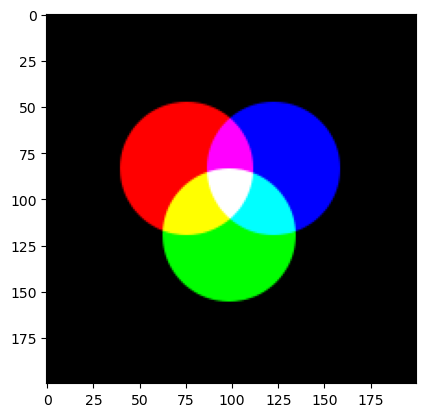

In [103]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
# testimage=img.imread('photoshop_created_image5.png')
testimage=img.imread('photoshop_created_image.png')
testimage2=img.imread('NewImg2_sir.jpg')
testimage3=img.imread('brain_mri.jpeg')
plt.imshow(testimage,cmap='gray')
plt.show()

In [104]:
# to convert to grayscale
import cv2
img_gray = cv2.cvtColor(testimage, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale Image', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [105]:
print(testimage.shape)

(200, 200, 4)


In [106]:
print(np.max(img_gray))

1.0


In [107]:
def add_gaussian_noise(image, noise_percentage):
    # Calculate standard deviation based on percentage
    max_intensity = 1
    sigma = noise_percentage * max_intensity

    # Generate Gaussian noise
    gaussian_noise = np.random.normal(0, sigma, image.shape)
    
    # Add noise to the image
    noisy_image = image + gaussian_noise
    
    # Clip values to ensure they remain in the valid range
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.float32)
    
    return noisy_image

# Set the noise level (e.g., 10% of the maximum intensity)

# Apply Gaussian noise
noisy_image = add_gaussian_noise(img_gray*255, 15)

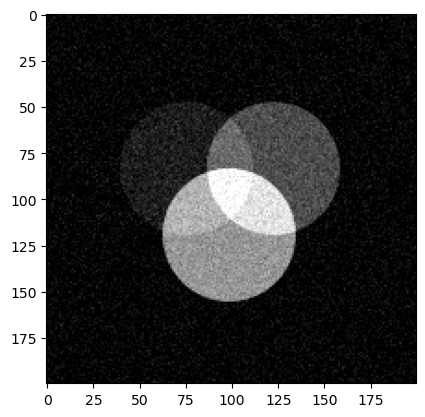

In [108]:
plt.imshow(noisy_image,cmap='gray')

In [109]:
print(np.unique(noisy_image))

[0.0000000e+00 1.9395215e-04 4.8667751e-04 ... 2.5467615e+02 2.5499110e+02
 2.5500000e+02]


In [110]:
def XIFS(image,beta):
    u=image #(x,y)
    nu=np.divide((1-u),(1+beta*u)) #(x,y)
    hes=1-nu-u #(x,y)
    xifs=np.array([u,nu,hes],dtype=np.float32) #(3,x,y)
    xifs=np.transpose(xifs, (1, 2, 0)) #(x,y,3)
    return xifs

In [111]:
print(XIFS(noisy_image,1.2).shape)

(200, 200, 3)


In [112]:
print(np.unique(XIFS(noisy_image,10)))

[-253.90044 -253.89154 -253.57658 ...  254.67615  254.9911   255.     ]


In [128]:
data=XIFS(noisy_image*255,20)
m=2
epochs=1000
ws=3
alpha=5
c=4
U,Cen,OBJ,Dist_Mat,sni=IFCM(data,ws,m,c,alpha,epochs)

Itteration  0 Differnce 18383.33695954225
Itteration  1 Differnce 3107.7735816706213
Itteration  2 Differnce 4868.850558728938
Itteration  3 Differnce 13423.03774316607
Itteration  4 Differnce 18591.742101385295
Itteration  5 Differnce 8586.232555328337
Itteration  6 Differnce 2484.631517846571
Itteration  7 Differnce 1677.3879766559426
Itteration  8 Differnce 1307.4698615973857
Itteration  9 Differnce 1007.6762253160142
Itteration  10 Differnce 776.2524274509807
Itteration  11 Differnce 594.5491373052448
Itteration  12 Differnce 454.5537489122546
Itteration  13 Differnce 348.7408947270302
Itteration  14 Differnce 269.3280325029066
Itteration  15 Differnce 209.76526210536954
Itteration  16 Differnce 164.58356587600758
Itteration  17 Differnce 129.9946168557205
Itteration  18 Differnce 103.28540072251482
Itteration  19 Differnce 82.5238621078712
Itteration  20 Differnce 66.25956337957275
Itteration  21 Differnce 53.41825964567556
Itteration  22 Differnce 43.212183262359815
Itteration  2

In [129]:
Umax = (U == U.max(axis=2)[:,:,None]).astype(float)
print(Umax.shape)
seg1 = Umax[:,:,0]
# seg1 = np.reshape(seg1,img_gray.shape)
seg2 = Umax[:,:,1]
# seg2 = np.reshape(seg2,img_gray.shape)
seg3 = Umax[:,:,2]
# seg3 = np.reshape(seg3,img_gray.shape)
seg4 = Umax[:,:,3]
# seg4 = np.reshape(seg4,img_gray.shape)
# seg = append all seg1, seg2, seg3

(200, 200, 4)


In [130]:
print(np.unique(seg1))

[0. 1.]


In [131]:
seg1,seg2,seg3,seg4=sorted([seg1,seg2,seg3,seg4],key=lambda m: np.mean(m))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Clusters after IFCMSNI')

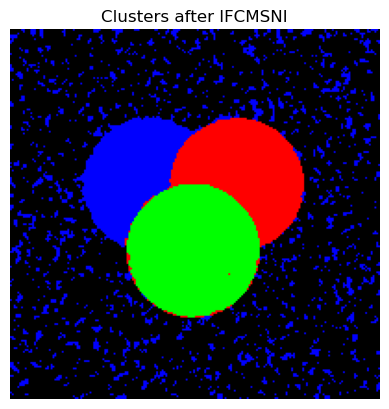

In [132]:
cmb=np.dstack((seg1,seg2*2,seg3*3))
plt.imshow(cmb,cmap='gray')
plt.axis('off')
plt.title('Clusters after IFCMSNI')

[]

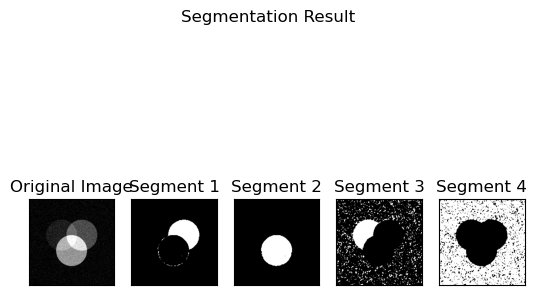

In [133]:
fig, axs = plt.subplots(1,5)
fig.suptitle('Segmentation Result')
axs[0].imshow(noisy_image,'gray')
axs[0].set_title('Original Image')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(seg1,'gray')
axs[1].set_title('Segment 1')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(seg2,'gray')
axs[2].set_title('Segment 2')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(seg3,'gray')
axs[3].set_title('Segment 3')
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[4].imshow(seg4,'gray')
axs[4].set_title('Segment 4')
axs[4].set_xticks([])
axs[4].set_yticks([])

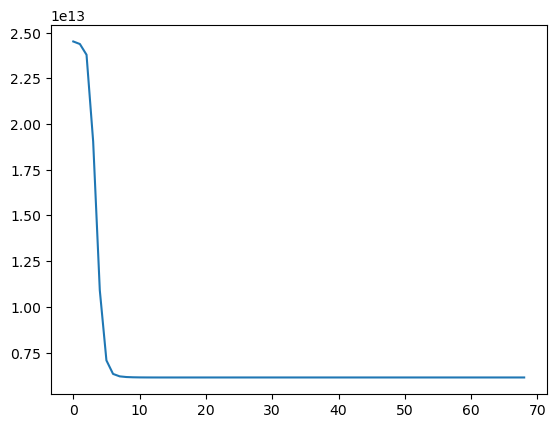

In [134]:
def Plot(obj):
  y = obj
  y.pop(0)
  x = list(range(0,len(obj)))
  return plt.plot(x, y)
Plot(OBJ)

In [135]:
data=XIFS(img_gray*255,20)
m=2
epochs=1000
ws=3
alpha=5
c=4
U,Cen,OBJ,Dist_Mat,sni=IFCM(data,ws,m,c,alpha,epochs)

Itteration  0 Differnce 18201.52709644969
Itteration  1 Differnce 3349.286449884853
Itteration  2 Differnce 5542.488043844471
Itteration  3 Differnce 19034.559788478207
Itteration  4 Differnce 28693.34570454981
Itteration  5 Differnce 7749.61982057129
Itteration  6 Differnce 2414.9957368152363
Itteration  7 Differnce 881.4707940600997
Itteration  8 Differnce 285.22358675522497
Itteration  9 Differnce 152.53926158930088
Itteration  10 Differnce 92.39649136838267
Itteration  11 Differnce 58.14054996937051
Itteration  12 Differnce 37.74553388234992
Itteration  13 Differnce 24.51459653383759
Itteration  14 Differnce 16.120145908567732
Itteration  15 Differnce 10.577703491498685
Itteration  16 Differnce 7.002613030388633
Itteration  17 Differnce 4.616727623141388
Itteration  18 Differnce 3.0568775737684453
Itteration  19 Differnce 2.0177736987339863
Itteration  20 Differnce 1.3380840986646245
Itteration  21 Differnce 0.8843002281210859
Itteration  22 Differnce 0.5866385948286964
Itteration 

In [136]:
Umax = (U == U.max(axis=2)[:,:,None]).astype(float)
print(Umax.shape)
seg1 = Umax[:,:,0]
# seg1 = np.reshape(seg1,img_gray.shape)
seg2 = Umax[:,:,1]
# seg2 = np.reshape(seg2,img_gray.shape)
seg3 = Umax[:,:,2]
# seg3 = np.reshape(seg3,img_gray.shape)
seg4 = Umax[:,:,3]
# seg4 = np.reshape(seg4,img_gray.shape)
# seg = append all seg1, seg2, seg3

(200, 200, 4)


In [137]:
seg1,seg2,seg3,seg4=sorted([seg1,seg2,seg3,seg4],key=lambda m: np.mean(m))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Clusters after IFCMSNI')

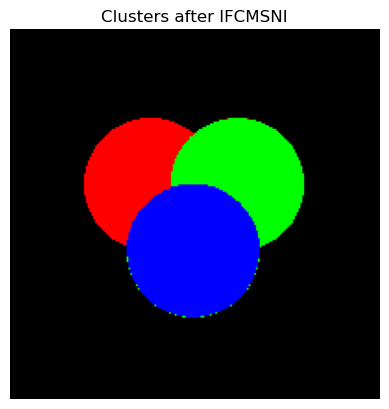

In [138]:
cmb=np.dstack((seg1,seg2*2,seg3*3))
plt.imshow(cmb,cmap='gray')
plt.axis('off')
plt.title('Clusters after IFCMSNI')

[]

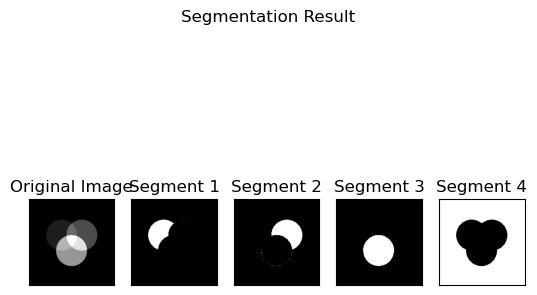

In [139]:
fig, axs = plt.subplots(1,5)
fig.suptitle('Segmentation Result')
axs[0].imshow(img_gray,'gray')
axs[0].set_title('Original Image')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(seg1,'gray')
axs[1].set_title('Segment 1')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(seg2,'gray')
axs[2].set_title('Segment 2')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(seg3,'gray')
axs[3].set_title('Segment 3')
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[4].imshow(seg4,'gray')
axs[4].set_title('Segment 4')
axs[4].set_xticks([])
axs[4].set_yticks([])

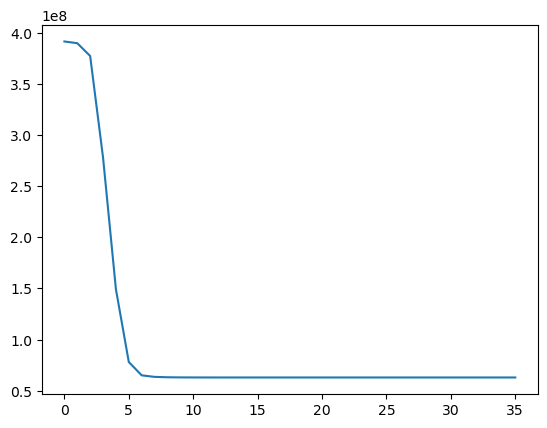

In [140]:
def Plot(obj):
  y = obj
  y.pop(0)
  x = list(range(0,len(obj)))
  return plt.plot(x, y)
Plot(OBJ)

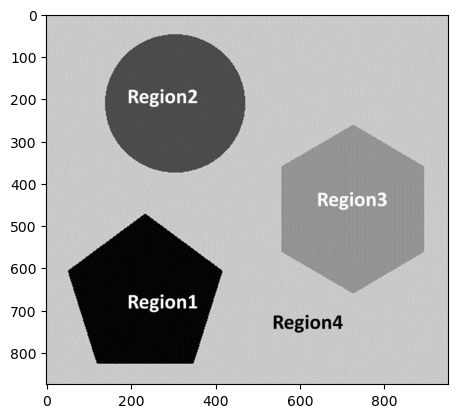

In [141]:
plt.imshow(testimage2,cmap='gray')
plt.show()

In [152]:
data=XIFS(testimage2,20)
m=2
epochs=1000
ws=3
alpha=1
c=4
U,Cen,OBJ,Dist_Mat,sni=IFCM(data,ws,m,c,alpha,epochs)

Itteration  0 Differnce 377138.8583711525
Itteration  1 Differnce 19476.09542475915
Itteration  2 Differnce 15263.412215130453
Itteration  3 Differnce 57028.209150972514
Itteration  4 Differnce 211106.35723212778
Itteration  5 Differnce 516072.1561234944
Itteration  6 Differnce 493961.05559807713
Itteration  7 Differnce 155342.77724841406
Itteration  8 Differnce 122679.47145764873
Itteration  9 Differnce 64777.50642963554
Itteration  10 Differnce 4679.999210795583
Itteration  11 Differnce 585.9622238167043
Itteration  12 Differnce 115.51735183833458
Itteration  13 Differnce 34.30552801588592
Itteration  14 Differnce 11.609162224712469
Itteration  15 Differnce 4.504627457437459
Itteration  16 Differnce 1.89019937021729
Itteration  17 Differnce 0.8593771184038964
Itteration  18 Differnce 0.4120972114528433
Itteration  19 Differnce 0.2067091673247762
Itteration  20 Differnce 0.10668621606777652
Itteration  21 Differnce 0.05645768703768535
Itteration  22 Differnce 0.03035782763589404
Itter

In [153]:
Umax = (U == U.max(axis=2)[:,:,None]).astype(float)
print(Umax.shape)
seg1 = Umax[:,:,0]
# seg1 = np.reshape(seg1,img_gray.shape)
seg2 = Umax[:,:,1]
# seg2 = np.reshape(seg2,img_gray.shape)
seg3 = Umax[:,:,2]
# seg3 = np.reshape(seg3,img_gray.shape)
seg4 = Umax[:,:,3]
# seg4 = np.reshape(seg4,img_gray.shape)
# seg = append all seg1, seg2, seg3

(875, 950, 4)


In [154]:
seg1,seg2,seg3,seg4=sorted([seg1,seg2,seg3,seg4],key=lambda m: np.mean(m))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Clusters after IFCMSNI')

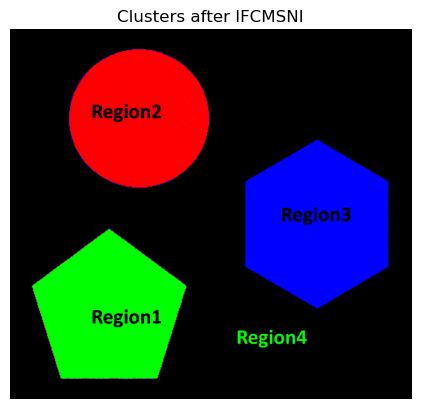

In [155]:
cmb=np.dstack((seg1,seg2*2,seg3*3))
plt.imshow(cmb,cmap='gray')
plt.axis('off')
plt.title('Clusters after IFCMSNI')

[]

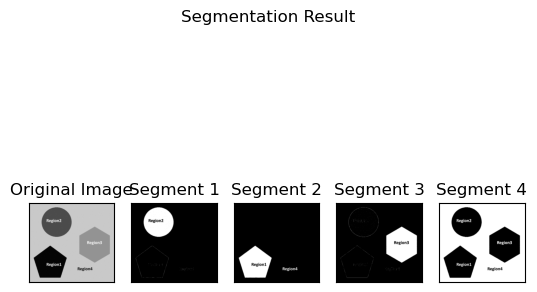

In [156]:
fig, axs = plt.subplots(1,5)
fig.suptitle('Segmentation Result')
axs[0].imshow(testimage2,'gray')
axs[0].set_title('Original Image')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(seg1,'gray')
axs[1].set_title('Segment 1')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(seg2,'gray')
axs[2].set_title('Segment 2')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(seg3,'gray')
axs[3].set_title('Segment 3')
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[4].imshow(seg4,'gray')
axs[4].set_title('Segment 4')
axs[4].set_xticks([])
axs[4].set_yticks([])

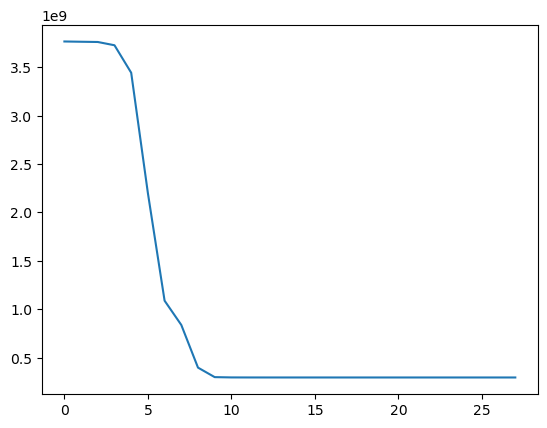

In [157]:
def Plot(obj):
  y = obj
  y.pop(0)
  x = list(range(0,len(obj)))
  return plt.plot(x, y)
Plot(OBJ)

In [158]:
# to convert to grayscale
import cv2
img_gray = cv2.cvtColor(testimage3, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale Image', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

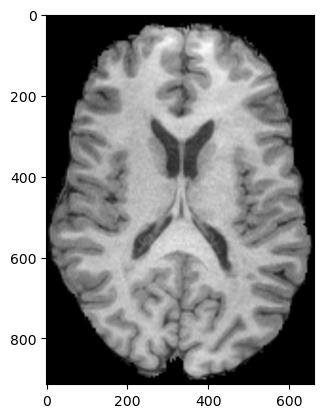

In [159]:
plt.imshow(img_gray,cmap='gray')
plt.show()

In [170]:
data=XIFS(img_gray*255,20)
m=2
epochs=1000
ws=3
alpha=2
c=4
U,Cen,OBJ,Dist_Mat,sni=IFCM(data,ws,m,c,alpha,epochs)

Itteration  0 Differnce 279485.10294166533
Itteration  1 Differnce 26855.017939563884
Itteration  2 Differnce 11606.486389524805
Itteration  3 Differnce 25925.210738268834
Itteration  4 Differnce 78776.15707824759
Itteration  5 Differnce 197818.87747460313
Itteration  6 Differnce 284573.8061631807
Itteration  7 Differnce 263335.818808238
Itteration  8 Differnce 216208.79720987056
Itteration  9 Differnce 88056.45412721392
Itteration  10 Differnce 52791.16481895008
Itteration  11 Differnce 40940.94063707256
Itteration  12 Differnce 33046.727347823384
Itteration  13 Differnce 26901.885269435
Itteration  14 Differnce 21915.42621990629
Itteration  15 Differnce 17807.933282194594
Itteration  16 Differnce 14392.014356743923
Itteration  17 Differnce 11557.53276118145
Itteration  18 Differnce 9222.230217692259
Itteration  19 Differnce 7315.950406561618
Itteration  20 Differnce 5773.909406117719
Itteration  21 Differnce 4536.765662944716
Itteration  22 Differnce 3551.6055930599437
Itteration  23

In [171]:
Umax = (U == U.max(axis=2)[:,:,None]).astype(float)
print(Umax.shape)
seg1 = Umax[:,:,0]
# seg1 = np.reshape(seg1,img_gray.shape)
seg2 = Umax[:,:,1]
# seg2 = np.reshape(seg2,img_gray.shape)
seg3 = Umax[:,:,2]
# seg3 = np.reshape(seg3,img_gray.shape)
seg4 = Umax[:,:,3]
# seg4 = np.reshape(seg4,img_gray.shape)
# seg = append all seg1, seg2, seg3

(914, 662, 4)


In [172]:
seg1,seg2,seg3,seg4=sorted([seg1,seg2,seg3,seg4],key=lambda m: np.mean(m))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Clusters after IFCMSNI')

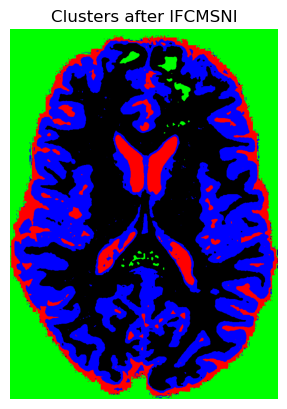

In [173]:
cmb=np.dstack((seg1,seg2*2,seg3*3))
plt.imshow(cmb,cmap='gray')
plt.axis('off')
plt.title('Clusters after IFCMSNI')

[]

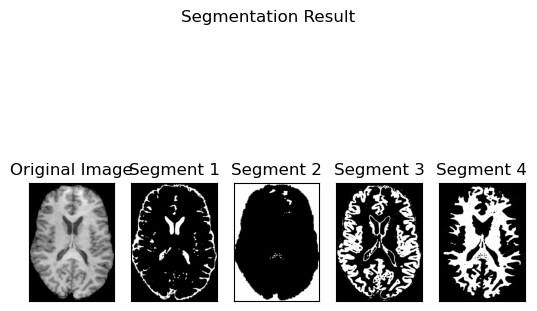

In [174]:
fig, axs = plt.subplots(1,5)
fig.suptitle('Segmentation Result')
axs[0].imshow(img_gray,'gray')
axs[0].set_title('Original Image')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(seg1,'gray')
axs[1].set_title('Segment 1')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(seg2,'gray')
axs[2].set_title('Segment 2')
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(seg3,'gray')
axs[3].set_title('Segment 3')
axs[3].set_xticks([])
axs[3].set_yticks([])
axs[4].imshow(seg4,'gray')
axs[4].set_title('Segment 4')
axs[4].set_xticks([])
axs[4].set_yticks([])

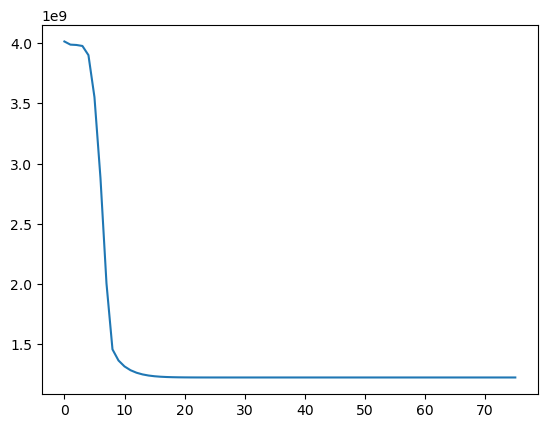

In [175]:
def Plot(obj):
  y = obj
  y.pop(0)
  x = list(range(0,len(obj)))
  return plt.plot(x, y)
Plot(OBJ)